# 🧠 Convolutional Neural Network (CNN) for Image Classification

This notebook demonstrates a **Convolutional Neural Network (CNN)** for image classification using **TensorFlow/Keras**.  

### **Project Workflow**
1. Import libraries & load dataset (CIFAR-10)
2. Explore & preprocess data
3. Build a CNN model
4. Train & evaluate the model
5. Visualize performance metrics


"**Import libraries & load dataset (CIFAR-10)**

In [2]:
# Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.18.0


## 📂 Step 2: Load the CIFAR-10 Dataset

- CIFAR-10 contains **60,000 images** of size **32x32x3 (RGB)**.
- Divided into **50,000 training** and **10,000 testing images**.
- **10 Classes:** Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck

In [4]:
# Load CIFAR-10 Dataset (Directly from TensorFlow)
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize images to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten labels (from shape (n,1) to (n,))
y_train, y_test = y_train.flatten(), y_test.flatten()

print("Training Data Shape:", x_train.shape)
print("Test Data Shape:", x_test.shape)
print("Sample Label:", y_train[0])


Training Data Shape: (50000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)
Sample Label: 6


## 👀 Step 3: Visualize Sample Images

Before training, let's look at a few **sample images** to understand the dataset visually.


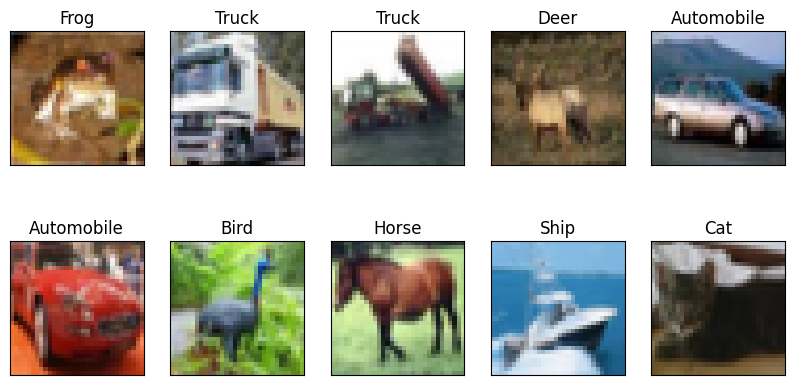

In [5]:
# Class labels for CIFAR-10
class_names = ['Airplane','Automobile','Bird','Cat','Deer',
               'Dog','Frog','Horse','Ship','Truck']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
plt.show()


## 🏗️ Step 4: Build Convolutional Neural Network (CNN)

Our CNN will consist of the following layers:

1. **Input Layer:** 32×32 RGB image
2. **Convolution Layer 1:** 32 filters, 3×3 kernel, ReLU activation
3. **Max Pooling Layer 1:** 2×2 pooling
4. **Convolution Layer 2:** 64 filters, 3×3 kernel, ReLU activation
5. **Max Pooling Layer 2:** 2×2 pooling
6. **Convolution Layer 3:** 64 filters, 3×3 kernel, ReLU activation
7. **Flatten Layer:** Convert 2D feature maps to 1D vector
8. **Fully Connected Layer:** 64 neurons, ReLU activation
9. **Output Layer:** 10 neurons, Softmax activation (for 10 classes)

> **Optimizer:** Adam  
> **Loss Function:** Sparse Categorical Crossentropy  
> **Metric:** Accuracy


In [6]:
# Step 4: Build CNN Model using Keras Sequential API
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # Output layer for 10 classes
])

# Display Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## ⚙️ Step 5: Compile the Model

- **Optimizer:** Adam (Adaptive learning rate optimization)
- **Loss Function:** Sparse Categorical Crossentropy (multi-class classification with integer labels)
- **Metric:** Accuracy (to evaluate model performance)


In [7]:
# Compile the CNN model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## 🏋️ Step 6: Train the CNN Model

We will train the model for **10 epochs** with a **batch size of 64**.

- **Training Data:** 50,000 images  
- **Validation Data:** 10,000 images  
- **Output:** Training & Validation Accuracy/Loss per epoch


In [8]:
# Train the model and store training history
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 84ms/step - accuracy: 0.3437 - loss: 1.7766 - val_accuracy: 0.5247 - val_loss: 1.3203
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.5532 - loss: 1.2562 - val_accuracy: 0.5905 - val_loss: 1.1609
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.6196 - loss: 1.0757 - val_accuracy: 0.6332 - val_loss: 1.0284
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 84ms/step - accuracy: 0.6621 - loss: 0.9665 - val_accuracy: 0.6617 - val_loss: 0.9664
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.6889 - loss: 0.8886 - val_accuracy: 0.6807 - val_loss: 0.9205
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.7138 - loss: 0.8156 - val_accuracy: 0.6885 - val_loss: 0.9048
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.7344 - loss: 0.7630 - val_accuracy: 0.6974 - val_loss: 0.8848
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.7531 - loss: 0.7109 - 

## 📊 Step 7: Visualize Training and Validation Performance

Plot **Accuracy** and **Loss** curves to understand:
- If the model is learning properly
- If there is overfitting or underfitting


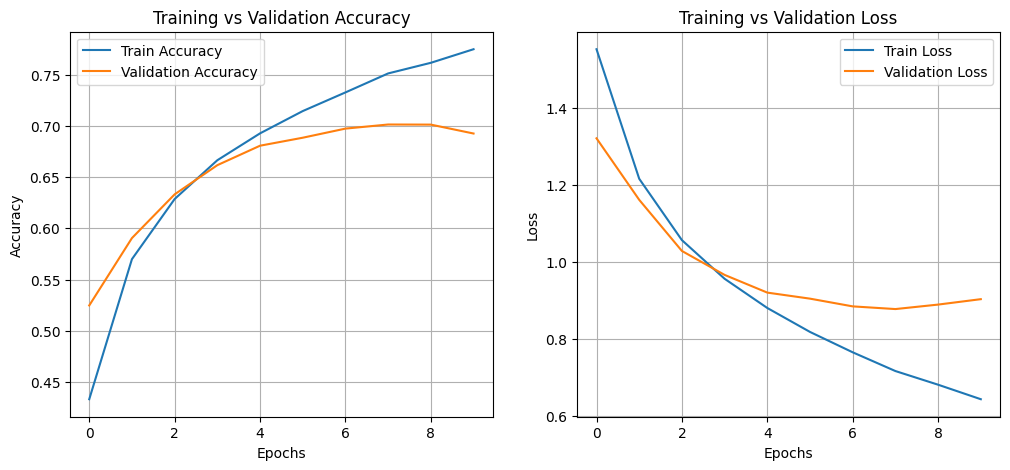

In [9]:
# Plot Accuracy and Loss curves
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend(); plt.grid(True)

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend(); plt.grid(True)

plt.show()


## ✅ Step 8: Evaluate Model Performance on Test Dataset

We will check:
1. **Final Test Accuracy**
2. **Confusion Matrix**
3. **Classification Report (Precision, Recall, F1-score)**

> This helps to identify which classes are predicted well and where the model struggles.


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6942 - loss: 0.8914

🎯 Test Accuracy: 69.26%
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


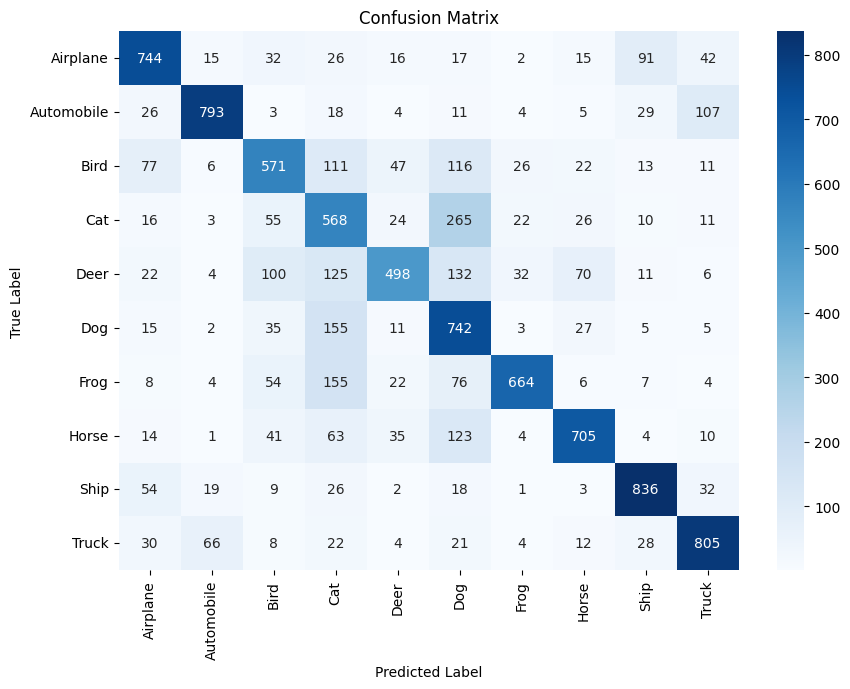


📋 Classification Report:

              precision    recall  f1-score   support

    Airplane       0.74      0.74      0.74      1000
  Automobile       0.87      0.79      0.83      1000
        Bird       0.63      0.57      0.60      1000
         Cat       0.45      0.57      0.50      1000
        Deer       0.75      0.50      0.60      1000
         Dog       0.49      0.74      0.59      1000
        Frog       0.87      0.66      0.75      1000
       Horse       0.79      0.70      0.75      1000
        Ship       0.81      0.84      0.82      1000
       Truck       0.78      0.81      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.72      0.69      0.70     10000
weighted avg       0.72      0.69      0.70     10000



In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Step 8.1: Evaluate Accuracy on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n🎯 Test Accuracy: {test_acc*100:.2f}%")

# Step 8.2: Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 8.3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 8.4: Classification Report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=class_names))


## 💾 Step 9: Save & Load Trained Model

We save the trained model so we can:
- Deploy it later without retraining
- Share it or upload to GitHub


In [11]:
# Save the model in HDF5 format
model.save("cnn_cifar10_model.h5")
print("✅ Model saved as cnn_cifar10_model.h5")


✅ Model saved as cnn_cifar10_model.h5


In [13]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("cnn_cifar10_model.h5")

# Verify by evaluating on test data
loss, acc = loaded_model.evaluate(x_test, y_test)
print(f"Loaded Model Accuracy: {acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6942 - loss: 0.8914
Loaded Model Accuracy: 69.26%
